In [11]:
from torchvision import datasets, transforms

In [12]:
mnist_data = list(datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor()))
mnist_train = mnist_data[:4096]
mnist_val = mnist_data[4096:5120]

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim

In [14]:
torch.manual_seed(1)

class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        self.layer1 = nn.Linear(28*28, 50)
        self.layer2 = nn.Linear(50, 20)
        self.layer3 = nn.Linear(20, 10)
    def forward(self, img):
        flattened = img.view(-1, 28*28)
        activation1 = F.relu(self.layer1(flattened))
        activation2 = F.relu(self.layer2(activation1))
        return self.layer3(activation2)
    
model = MNISTClassifier()

In [15]:
def get_accuracy(model, train=False):
    data = mnist_train if train else mnist_val
    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64):
        output = model(imgs)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct/total

In [16]:
def train(model, data, batch_size=64, num_epochs=1):
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train=True)) # compute training accuracy 
            val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
            n += 1

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

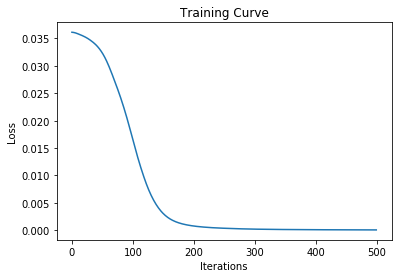

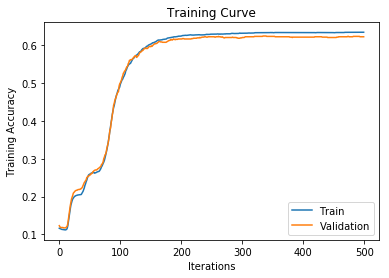

Final Training Accuracy: 0.635009765625
Final Validation Accuracy: 0.623046875
Accuracy on batch of 64:  1.0


In [17]:
#overfitting the model (sanity check)
debug_data = mnist_train[:64]
model = MNISTClassifier()
train(model, debug_data, num_epochs=500)

#obtain accuracy on 64 samples
correct = 0
total = 0
for imgs, labels in torch.utils.data.DataLoader(debug_data, batch_size=64):
    output = model(imgs)
    #select index with maximum prediction score
    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += imgs.shape[0]
print('Accuracy on batch of 64: ', correct / total)

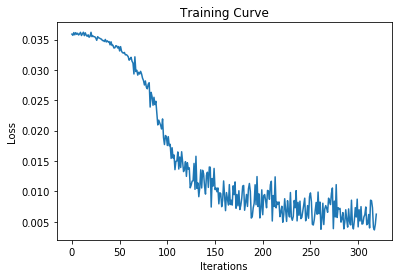

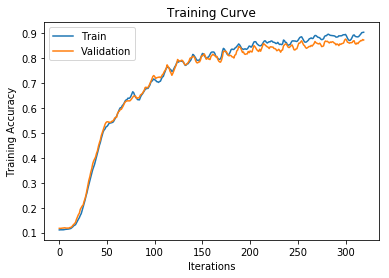

Final Training Accuracy: 0.904296875
Final Validation Accuracy: 0.873046875


In [18]:
model = MNISTClassifier()
train(model, mnist_train, num_epochs=5)

Image Dimensions:  torch.Size([1, 28, 28])
Output Dimensions:  torch.Size([1, 10])
Output Probabilities:  tensor([[4.2062e-05, 8.8035e-07, 2.9470e-04, 5.9918e-04, 1.1492e-02, 2.1444e-03,
         1.1598e-05, 8.1460e-02, 7.0450e-03, 8.9691e-01]],
       grad_fn=<SoftmaxBackward>) sum:  tensor(1., grad_fn=<SumBackward0>)
Output:  9 with a probability of  0.8969108462333679
Label:  9


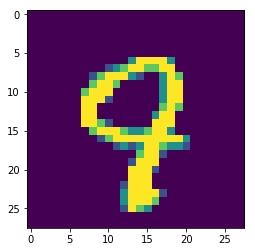

In [19]:
img, label = list(mnist_data[19120])
print("Image Dimensions: ", img.shape)
plt.imshow(img.view(-1,28))
out = model(img)
prob = F.softmax(out, dim=1)
print("Output Dimensions: ", out.shape)
print("Output Probabilities: ", prob, "sum: ", torch.sum(prob))
print("Output: ", prob.max(1, keepdim=True)[1].item(), "with a probability of ", prob.max(1, keepdim=True)[0].item())
print("Label: ", label)

Min Val:  0.0 Max Val:  1.0


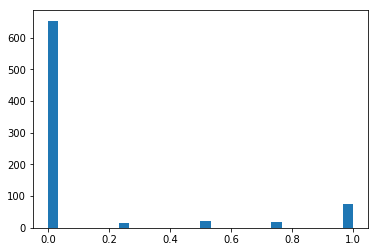

In [20]:
print("Min Val: ", torch.min(img).item(), "Max Val: ", torch.max(img).item())
plt.hist(img.view(-1,28*28), bins=30)
plt.show()

In [22]:
img_new = plt.imread('https://www.researchgate.net/profile/Hariton_Costin/publication/311806756/figure/fig1/AS:542753920229376@1506414026147/Sample-of-the-MNIST-dataset-of-handwritten-digits.png')

In [23]:
print("Image Dimensions: ", img_new.shape)
print("Image Type: ", img_new.dtype)

Image Dimensions:  (318, 310, 3)
Image Type:  float32


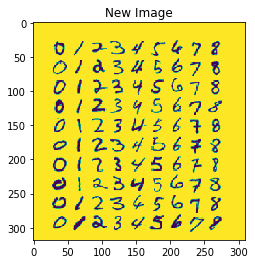

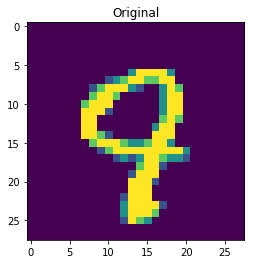

In [24]:
import numpy as np

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

img_gray = rgb2gray(img_new)

plt.title("New Image")
plt.imshow(img_gray)
plt.show()

plt.title("Original")
plt.imshow(img.view(-1,28))

Image Dimensions (248, 203, 3)


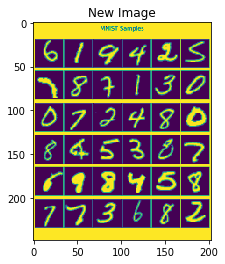

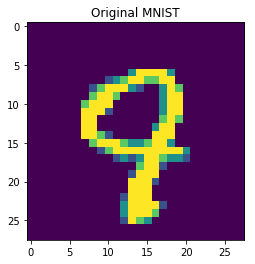

In [25]:
import numpy as np
import matplotlib.pyplot as plt

#load an image with black and white matching the MNIST data
img_new = plt.imread('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT5ZR8ImWkYVd2FRMZgUvCdNkHx0uKjjSAtTEJ0U-x0SPWQFxqnbg')
print('Image Dimensions', img_new.shape)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])
  
img_gray = rgb2gray(img_new)

plt.title("New Image")
plt.imshow(img_gray)
plt.show()

# compare to original MNIST image
plt.title("Original MNIST")
plt.imshow(img.view(-1,28)) 

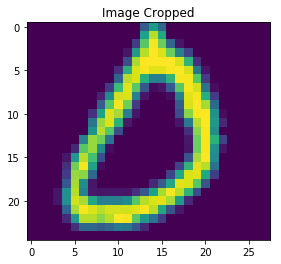

C:\Users\Maxwell\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


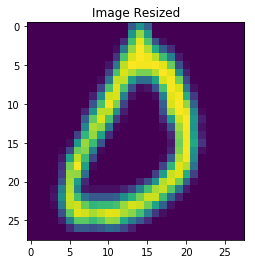

1.0299999999999998
0.0


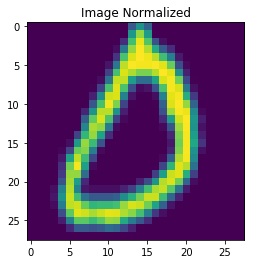

1.0
0.0


In [26]:
img_cropped = img_gray[95:120,5:33]
plt.title("Image Cropped")
plt.imshow(img_cropped)
plt.show()

from skimage.transform import rescale, resize, downscale_local_mean
img_resized = resize(img_cropped, (28,28), anti_aliasing=True)

plt.title("Image Resized")
plt.imshow(img_resized)
plt.show()

print(np.amax(img_resized))
print(np.amin(img_resized))

img_resized /= np.amax(img_resized)
plt.title("Image Normalized")
plt.imshow(img_resized)
plt.show()

print(np.amax(img_resized))
print(np.amin(img_resized))

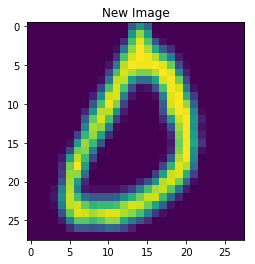

Initial Dimensions:  torch.Size([28, 28])
Updated Dimensions:  torch.Size([1, 28, 28])
Output Dimensions:  torch.Size([1, 10])
Output Probabilities:  tensor([[9.4754e-01, 3.4052e-08, 3.1480e-03, 3.1129e-02, 7.9084e-08, 1.5905e-02,
         5.3222e-08, 1.0508e-03, 8.4885e-04, 3.8327e-04]],
       grad_fn=<SoftmaxBackward>) sum:  tensor(1., grad_fn=<SumBackward0>)
Predicted Output:  0 with a probability of  0.9475356340408325


In [28]:
plt.title("New Image")
plt.imshow(img_resized)
plt.show()

img_new = torch.tensor(img_resized)
print("Initial Dimensions: ", img_new.shape)

img_new = img_new.unsqueeze(0).type(torch.FloatTensor)
print("Updated Dimensions: ", img_new.shape)

out = model(img_new)
prob = F.softmax(out, dim=1)

print("Output Dimensions: ", out.shape)
print("Output Probabilities: ", prob, "sum: ", torch.sum(prob))

print("Predicted Output: ", prob.max(1, keepdim=True)[1].item(), "with a probability of ", prob.max(1, keepdim=True)[0].item())